# Linear Regression
- Linear Regression is one of the easiest to understand and more commonly used algorithm for regression related tasks. The algorithm's main formula is, `y = mx+c`. Where,
    - `y` is the predicted value/dependent variable that the model tries to output.
    - `x` is the input value/ independent variable that the model uses to make the prediction.
    - `m` is the slope of the line. It is also called the weight of a model. `m` determines the effect of x on y.
    - `b` is the bias, which indicates where the line croses the y-axis when x=0.


# Implementation of Linear Regression in python
- LinearRegression Models can be implemented in python using `scikit-learn`'s `LinearRegression` object. Let's get coding !

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [46]:
df = pd.read_csv("Salary Data.csv") #Same data used in pandas and matplotlib

In [35]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [36]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [37]:
df = df.dropna()

In [38]:
df.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


# Dependent and independent variables:
- When tackling any from of classification or regression task in ML, one very important concept that we need to know and be familiar with is the concept of dependent and independent variables.

- **Dependent Variables:**
    - As the term suggests, dependent variables are the variables which depend on some other variables. These variables are generally predicted by our models and aren't influenced by the user input.

- **Independent Variables:**
    - Independent variables are the opposite of dependent variables, these don't depend on any other variables are generally measured in an experiment.

---

# Special Case:
- Let us consider a DataFrame `df` with columns A,B and C such that C depends on B and B depends on A. In such cases, `B` is both dependent and independent variable and the dependency is said to be relative to the relationship being analyzed. Hence, **context matters when figuring out dependent and independent variables.** 

In [39]:
df = df[['Years of Experience','Salary']]

In our case, Years of Experience is the indepent variable and Salary is the dependent one.

In [40]:
X = df[['Years of Experience']].values  
Y = df[['Salary']].values #this returns a 2d array

The first step to making any ML model is to train it, for that purpose we need to split the available data in two major parts, training and testing. The model will only be given the training data and we'll validate it with the test data. We can either define our own function to split the data or we can use the `train_test_split` function from scikit-learn library, which provides us with a bit more control to the data splits.

train_test_split params:
- `test_size` &#8594; Determines how much data to train the model on, amount of data to be used in testing. (in our case, we are giving the model 80% of the data to be trained on and testing with the remaining 20%)
- `random_state`  &#8594; Like a seed for randomness of the data split, use of specific value in random_state geenrates the randomness in a predictable way.
- X & Y &#8594; The actual data, can be a numpy array or a tensor.

Now that our data is ready, let's train the model!

In [ ]:
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.2,random_state=42)

In [48]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

The `.fit()` is actual training part in a model. It's in this part that our model tries to figure out the **best-fit line**, the **best-fit line** is simply a straight line that can best represent the relationship between the input and output. The best-fit line follows the equation `Y=mX+c`, where `m` is the slpoe that represents the change in Y when X increases by unit value and `c` is te point where the line crosses Y-axis when X=0.

Now that we have a model, let's make some predictions! To make predictions, we can use the `.predict()` function. 

In [47]:
exp = float(input("Enter years of experience = "))
exp = np.array([[exp]])
predicted_salary = model.predict(exp)
print("Your predicted_salary = ",predicted_salary)

Your predicted_salary =  [[65634.02849515]]


We need to turn the input to a Numpy array as that is the same data type our model was trained on. This ensures that no errors arise during the prediction. Our model will output the result in a numpy array as well! 

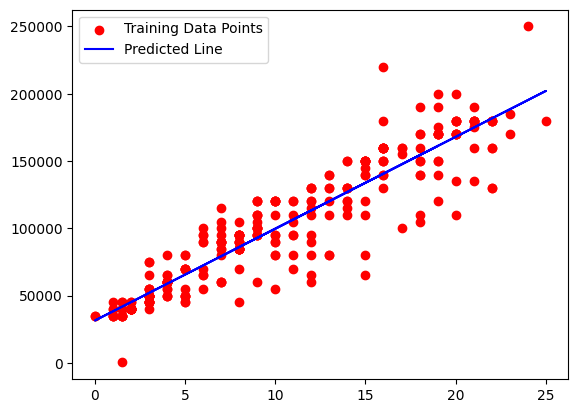

In [53]:
plt.scatter(X_train,Y_train,color = 'red',label="Training Data Points")
plt.plot(X_train,model.predict(X_train),color = 'blue',label="Predicted Line")
plt.legend()
plt.show()

In the chart above, we can see that the best fit line on our train data fits the data distrubition pretty much perfectly except for a few outliers. Let's see if the model figures out best fit line in the training data. 

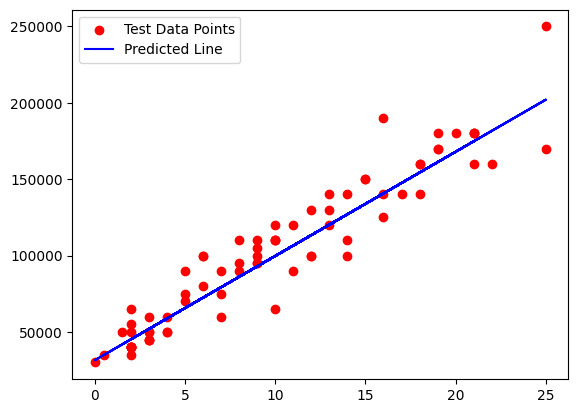

In [55]:
plt.scatter(X_test,Y_test,color = 'red',label="Test Data Points")
plt.plot(X_test,model.predict(X_test),color = 'blue',label="Predicted Line")
plt.legend()
plt.show()

And again, in the test data as well we can see that our model has figured out the best fit line! To further evaluate our model, we can use metrics like r<sup>2</sup> Score

In [57]:
from sklearn.metrics import r2_score
Y_pred = model.predict(X_test)
print(f"R² Score: {r2_score(Y_test, Y_pred)}")

R² Score: 0.8991338517367767


Our model is performing good, but we can make it better by **Scaling** the inputs given to the model. 

**Scaling:**
- Scaling refers to the process of adjusting the range of features so that they all are in a comparable range. In out current dataset, we can see that there are a few outliers that may have hindered our model. If we scale down our data and use the outliers, our model could perform better. There are several types of scaling in ML. They're:
- Standardization:
    - Standardization or min-max scaling is a type of scaling that scales and transforms the features so that they lie within a specific range,generally 0-1. Formula for Min-Max Scaling:

    x<sub>scaled</sub> = (x-x<sub>min</sub>)/(x<sub>max</sub>-x<sub>min</sub>) where, 

    x &#8594; Original Feature

    x<sub>min</sub> &#8594; Minimun value of a feature in the dataset.

    x<sub>max</sub> &#8594; Maximum value of a feature in the dataset.

    
